# Lending Case Study
## Analysis on defaulted loan cases and finding insights

In [722]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Load loan.csv file

In [11]:
#Load the file into a dataframe obj and see the first 5 rows of data
loan_df = pd.read_csv('loan.csv')
loan_df.head()

C:\Users\abant\AppData\Local\Temp\ipykernel_127600\1564615138.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Filter out only Charged Off loans (defaulted loans)

In [37]:
loan_df_refined = loan_df[loan_df['loan_status'] == 'Charged Off']
loan_df_refined.shape

(5627, 111)

### Drop irrelevant columns

#### Drop columns with all null values

In [41]:
loan_df_refined = loan_df_refined.dropna(axis=1, how='all')
loan_df_refined.shape

(5627, 56)

#### Check for null percentage for each column

In [43]:
100*loan_df_refined.isnull().sum()/5627

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      8.601386
emp_length                     4.051893
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.024169
purpose                        0.000000
title                          0.035543
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


#### Drop columns with more than 60% null valued

In [45]:
#Drop mths_since_last_delinq, mths_since_last_record
loan_df_refined = loan_df_refined.drop(['mths_since_last_delinq', 'mths_since_last_record', ],axis=1)

In [47]:
loan_df_refined.shape

(5627, 54)

#### Export the refined dataframe into a new csv file for easier glance in excel

In [50]:
loan_df_refined.to_csv('refined_loan.csv')

#### Checking values in excel and dropping any column that has the same value for all the rows

In [54]:
loan_df_refined['pymnt_plan'].value_counts()

pymnt_plan
n    5627
Name: count, dtype: int64

In [56]:
loan_df_refined = loan_df_refined.drop(['pymnt_plan'], axis=1)

In [60]:
loan_df_refined['initial_list_status'].value_counts()

initial_list_status
f    5627
Name: count, dtype: int64

In [62]:
loan_df_refined = loan_df_refined.drop(['initial_list_status'], axis=1)

In [64]:
loan_df_refined['out_prncp'].value_counts()

out_prncp
0.0    5627
Name: count, dtype: int64

In [66]:
loan_df_refined = loan_df_refined.drop(['out_prncp'], axis=1)

In [68]:
loan_df_refined['out_prncp_inv'].value_counts()

out_prncp_inv
0.0    5627
Name: count, dtype: int64

In [70]:
loan_df_refined = loan_df_refined.drop(['out_prncp_inv'], axis=1)

In [72]:
loan_df_refined['collections_12_mths_ex_med'].value_counts()

collections_12_mths_ex_med
0.0    5621
Name: count, dtype: int64

In [74]:
loan_df_refined = loan_df_refined.drop(['collections_12_mths_ex_med'], axis=1)

In [76]:
loan_df_refined['policy_code'].value_counts()

policy_code
1    5627
Name: count, dtype: int64

In [78]:
loan_df_refined = loan_df_refined.drop(['policy_code'], axis=1)

In [80]:
loan_df_refined['application_type'].value_counts()

application_type
INDIVIDUAL    5627
Name: count, dtype: int64

##### <b><i>Note - All Loan applicants are Individual. No Joint application</i></b>

In [85]:
loan_df_refined = loan_df_refined.drop(['application_type'], axis=1)

In [87]:
loan_df_refined['acc_now_delinq'].value_counts()

acc_now_delinq
0    5627
Name: count, dtype: int64

In [89]:
loan_df_refined = loan_df_refined.drop(['acc_now_delinq'], axis=1)

In [91]:
loan_df_refined['chargeoff_within_12_mths'].value_counts()

chargeoff_within_12_mths
0.0    5621
Name: count, dtype: int64

In [93]:
loan_df_refined = loan_df_refined.drop(['chargeoff_within_12_mths'], axis=1)

In [95]:
loan_df_refined['delinq_amnt'].value_counts()

delinq_amnt
0    5627
Name: count, dtype: int64

In [97]:
loan_df_refined = loan_df_refined.drop(['delinq_amnt'], axis=1)

In [99]:
loan_df_refined['tax_liens'].value_counts()

tax_liens
0.0    5626
Name: count, dtype: int64

In [101]:
loan_df_refined = loan_df_refined.drop(['tax_liens'], axis=1)

#### Remove categorical columns which are not relevant

In [104]:
#Remove url, desc, title columns
loan_df_refined = loan_df_refined.drop(['url', 'desc', 'title'], axis=1)

In [108]:
#Remove id and member_id columns
loan_df_refined = loan_df_refined.drop(['id', 'member_id'], axis=1)

In [110]:
loan_df_refined.shape

(5627, 38)

### Univariate Analysis of Columns

#### <b><i>loan_amnt</i> column</b>

In [118]:
loan_df_refined['loan_amnt'].dtypes

dtype('int64')

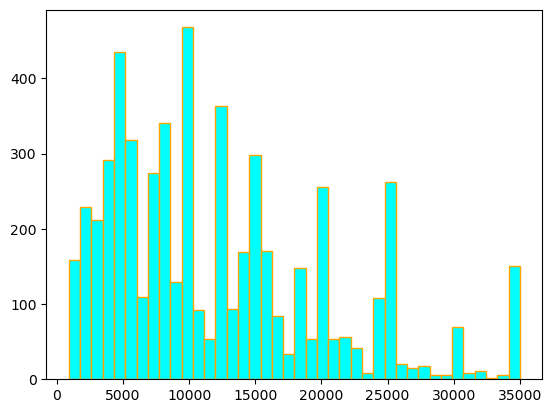

In [134]:
plt.hist(loan_df_refined['loan_amnt'], bins=40, edgecolor='orange', color='cyan')
plt.show()

In [146]:
loan_df_refined['loan_amnt'].value_counts()

loan_amnt
10000    362
12000    303
5000     287
15000    259
25000    252
        ... 
15775      1
19475      1
4475       1
27200      1
3175       1
Name: count, Length: 487, dtype: int64

In [166]:
loan_size = pd.cut(loan_df_refined['loan_amnt'], bins=[0,5000,7500,10000,12500,15000,17500,20000,22500,25000,27500,30000,40000], labels=['0-5000','5000-7500','7500-10000','10000-12500','12500-15000','15000-17500','17500-20000','20000-22500','22500-25000','25000-27500','27500-30000','>30000'])
loan_size.value_counts()

loan_amnt
0-5000         1314
7500-10000      945
5000-7500       697
12500-15000     560
10000-12500     495
17500-20000     452
22500-25000     398
15000-17500     299
>30000          180
20000-22500     144
27500-30000      97
25000-27500      46
Name: count, dtype: int64

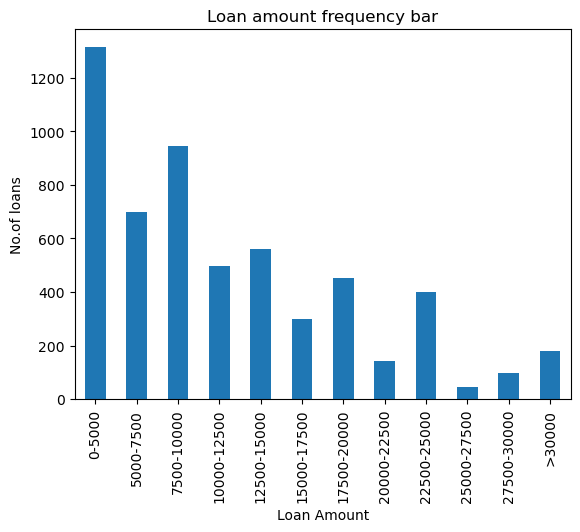

In [195]:
loan_size.value_counts().sort_index().plot.bar(title='Loan amount frequency bar',xlabel='Loan Amount', ylabel='No.of loans')
plt.show()

##### <i>As seen from the bar graph, the highest no.of applicants have applied for loans raning from 0 to 5000, followed by the range from 7500 to 10000.</i>

In [185]:
loan_df_refined['loan_amnt'].describe()

count     5627.000000
mean     12104.385108
std       8085.732038
min        900.000000
25%       5600.000000
50%      10000.000000
75%      16500.000000
max      35000.000000
Name: loan_amnt, dtype: float64

##### <i>The distribution of loan amount also shows that 50 percentile of applicants applied for upto loan amount of 10000. The minimum loan amount applied was 900 and the highest was 35000.</i>

#### <b><i>term</i> column</b>

In [193]:
loan_df_refined['term'].value_counts()

term
36 months    3227
60 months    2400
Name: count, dtype: int64

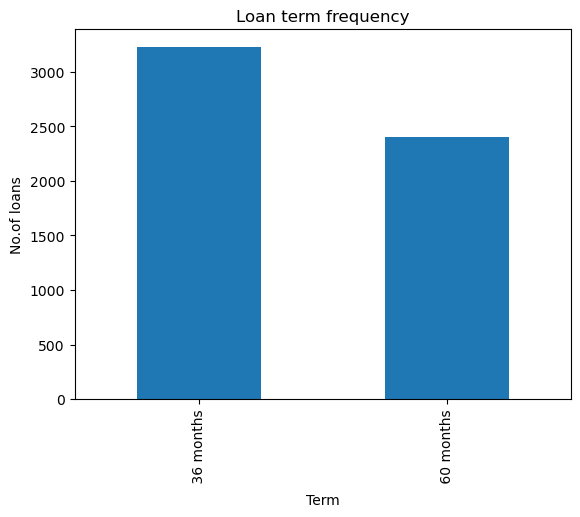

In [197]:
loan_df_refined['term'].value_counts().sort_index().plot.bar(title='Loan term frequency',xlabel='Term', ylabel='No.of loans')
plt.show()

#### <i>As seen from the above bar graph, loans for a tenure of 36 months are defaulted more than 60 months tenure.</i>

#### <b><i>int_rate</i> column</b>

In [203]:
loan_df_refined['int_rate'].value_counts()

int_rate
13.49%    127
11.49%    127
10.99%     95
11.71%     91
11.99%     76
         ... 
7.42%       1
20.69%      1
18.53%      1
14.18%      1
18.72%      1
Name: count, Length: 332, dtype: int64

In [207]:
#Formatting into float values
loan_df_refined['int_rate'] = loan_df_refined['int_rate'].str.replace('%','').astype('float64')

In [209]:
loan_df_refined['int_rate'].dtypes

dtype('float64')

In [211]:
#Finding the percentile distribution
loan_df_refined['int_rate'].describe()

count    5627.000000
mean       13.820432
std         3.654413
min         5.420000
25%        11.310000
50%        13.610000
75%        16.400000
max        24.400000
Name: int_rate, dtype: float64

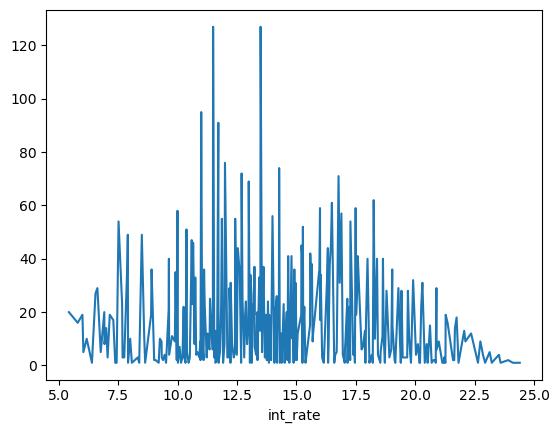

In [235]:
loan_df_refined['int_rate'].value_counts().sort_index().plot.line()
plt.show()

#### <i>As seen from the value count, statistical distibution and the line chart for interest rate column, below are the observations:
There are two peaks for 13.49% and 11.49% interset rates. Loans with these two interest rates have defaulted the most.
The average loan percentage is 13.82. Also, the median i.e., 50% of loans have the interset rate 13.61.
On both sides of the peak, the no.of defaulted loans is decreasing.

In [ ]:
#### Interest rates grouped by loan purpose

In [909]:
loan_df_refined.groupby(['purpose'])['int_rate'].mean()

purpose
car                  12.37
credit_card          13.41
debt_consolidation   14.28
educational          12.72
home_improvement     13.30
house                15.26
major_purchase       12.86
medical              13.32
moving               12.31
other                13.43
renewable_energy     12.22
small_business       14.20
vacation             11.61
wedding              13.49
Name: int_rate, dtype: float64

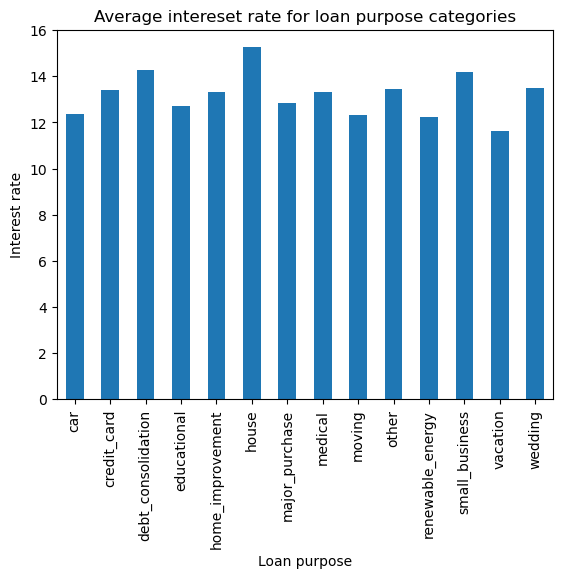

In [915]:
loan_df_refined.groupby(['purpose'])['int_rate'].mean().plot.bar(ylabel='Interest rate', xlabel='Loan purpose', title='Average intereset rate for loan purpose categories')
plt.show()

#### The average interest rate per loan purpose category is highest ~15 for house category followed by debt_consolidation and small_business. All the interest rates are at an average of more than 12%.

### <b><i>installment</i> column</b>

In [254]:
loan_df_refined['installment'].value_counts()

installment
276.06    9
324.42    8
296.75    8
203.59    7
320.95    7
         ..
153.78    1
355.99    1
59.19     1
301.10    1
678.08    1
Name: count, Length: 4317, dtype: int64

In [256]:
#Statistical distribution of installments
loan_df_refined['installment'].describe()

count    5627.000000
mean      336.175006
std       217.051841
min        22.790000
25%       168.555000
50%       293.870000
75%       457.840000
max      1305.190000
Name: installment, dtype: float64

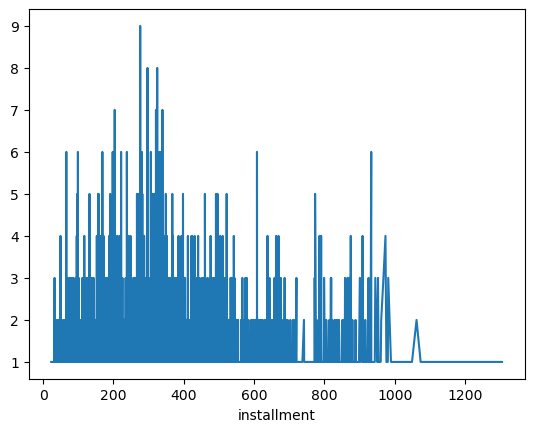

In [258]:
loan_df_refined['installment'].value_counts().sort_index().plot.line()
plt.show()

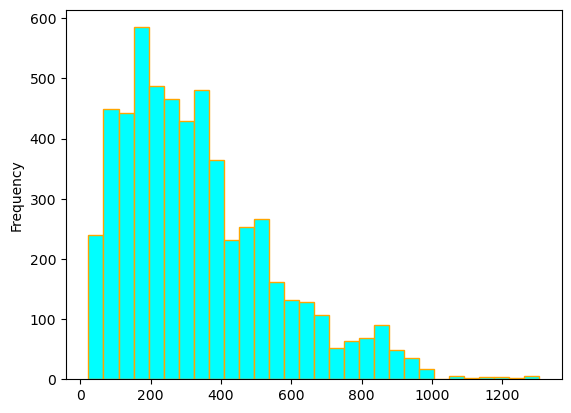

In [274]:
loan_df_refined['installment'].plot.hist(edgecolor='orange', color='cyan',bins=30)
plt.show()

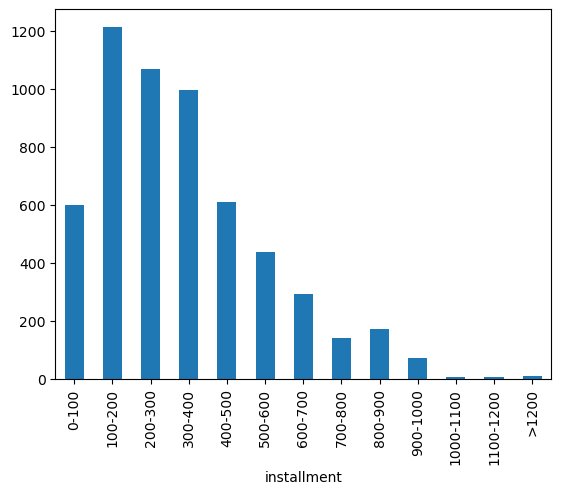

In [279]:
installment_range = pd.cut(loan_df_refined['installment'], bins=[0,100,200,300,400,500,600,700,800,900,1000,1100,1200,2000], labels=['0-100','100-200','200-300','300-400','400-500','500-600','600-700','700-800','800-900','900-1000','1000-1100','1100-1200','>1200'])
installment_range.value_counts().sort_index().plot.bar()
plt.show()

#### From the above graphs, it is observed that installments rangin from 100 to 200 default the most. Overall, installments raning from 100 to 400 contribute to maxium no. of defaulted loans.

C:\Users\abant\AppData\Local\Temp\ipykernel_127600\2764361541.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(installment_range.value_counts())


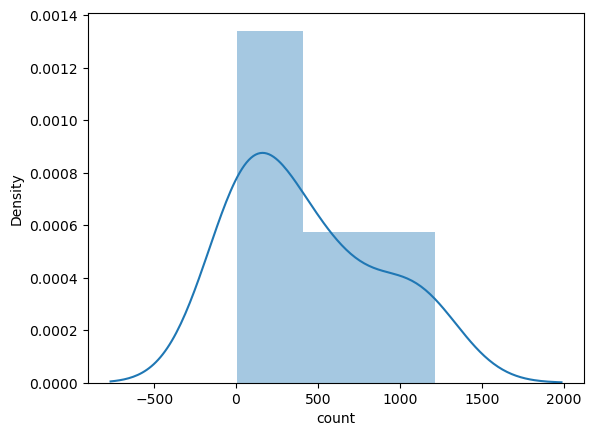

In [926]:
sns.distplot(installment_range.value_counts())
plt.show()

### <b><i>emp_length</i> Column</b>

In [286]:
loan_df_refined['emp_length'].value_counts()

emp_length
10+ years    1331
< 1 year      639
2 years       567
3 years       555
4 years       462
5 years       458
1 year        456
6 years       307
7 years       263
8 years       203
9 years       158
Name: count, dtype: int64

In [293]:
loan_df_refined['emp_length'].isnull().sum()

228

In [311]:
# There are 228 entries for which the value for experience years is missing.
#Lets check the annual_inc column for missing values
loan_df_refined['annual_inc'].isnull().sum()

0

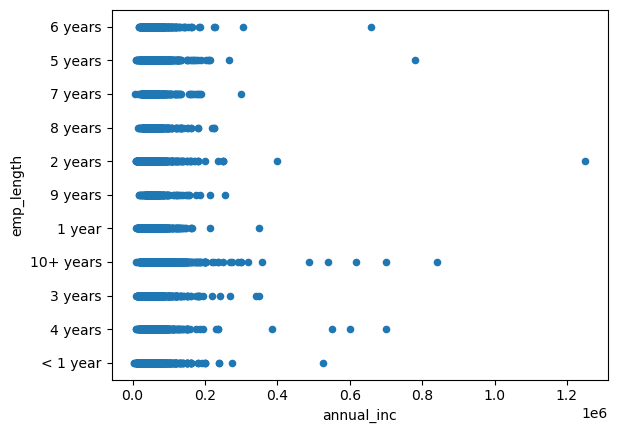

In [325]:
#Lets see a correlation between the employemnt length and annual income for existing data.

loan_df_refined[loan_df_refined['emp_length'].notnull()].plot.scatter(y='emp_length', x='annual_inc')
plt.show()

#### From the above scatter plot, for all expereince years, most of the applicants have annual income ranging in a common range.
#### Cannot really impute expreince years based on annual income.

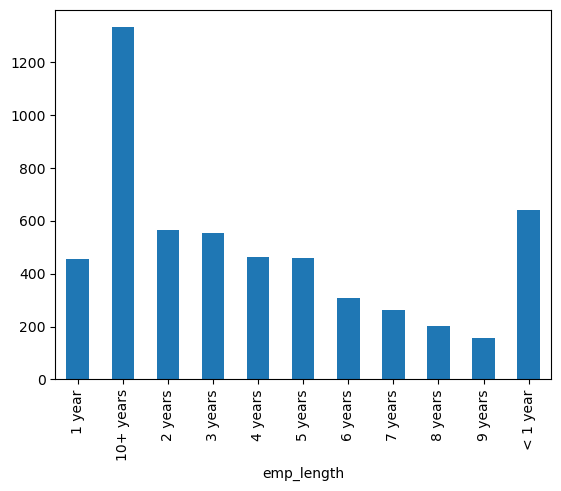

In [931]:
#Plotting a bar graph based on the values availabe for emp_length
loan_df_refined['emp_length'].value_counts().sort_index().plot.bar()
plt.show()

In [683]:
# If we consider the emp_length to be categorical and impute the values with mode which is 10+ years, the inference from plot is not going to change.
# 10+ years still have the highest defaulter number.
# If we convert emp_length to numerical then:
emp_length_num = loan_df_refined['emp_length'].str.replace(' years','');
emp_length_num = emp_length_num.str.replace(' year','');
emp_length_num = emp_length_num.str.replace('+','');
emp_length_num = emp_length_num.str.replace('< 1','0');
emp_length_num = emp_length_num.astype('float64')
loan_df_refined['emp_length_num'] = emp_length_num
emp_length_num.describe()

count   5399.00
mean       5.08
std        3.60
min        0.00
25%        2.00
50%        5.00
75%        9.00
max       10.00
Name: emp_length, dtype: float64

In [343]:
# From the distibution we can see the mean and median are both approx same at 5. If we impute the missing exp years with 5 then,
# years 5 will have 458 + 228 = 686 defaulters which still half of the highest defaulter category.
# Not imputing the missing values here as it is more likely to skew the analysis at least for the 2nd category of defaulters.

#### From the above analysis, it is inferred that applicants with more than 10 years experience default the most, followed by those who have less than a year experience. The number of <1 year deafulters is half of 10+ years exp.

### <b><i>home_ownership</i> Column</b>

In [345]:
loan_df_refined['home_ownership'].value_counts()

home_ownership
RENT        2839
MORTGAGE    2327
OWN          443
OTHER         18
Name: count, dtype: int64

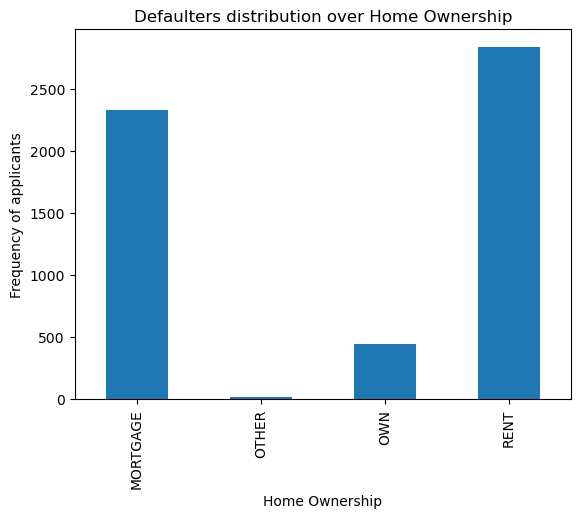

In [347]:
loan_df_refined['home_ownership'].value_counts().sort_index().plot.bar(title='Defaulters distribution over Home Ownership',xlabel='Home Ownership', ylabel='Frequency of applicants')
plt.show()

#### As can be seen from the above bar chart, applicants staying either in Rent or Mortgaged properties default significantly the most.

### <b><i>annual_inc</i> Column</b>

In [353]:
loan_df_refined['annual_inc'].dtypes

dtype('float64')

In [355]:
loan_df_refined['annual_inc'].isnull().sum()

0

In [361]:
round(loan_df_refined['annual_inc']).describe()

count    5.627000e+03
mean     6.242730e+04
std      4.777601e+04
min      4.080000e+03
25%      3.700000e+04
50%      5.300000e+04
75%      7.500000e+04
max      1.250000e+06
Name: annual_inc, dtype: float64

In [363]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [365]:
round(loan_df_refined['annual_inc']).describe()

count      5627.00
mean      62427.30
std       47776.01
min        4080.00
25%       37000.00
50%       53000.00
75%       75000.00
max     1250000.00
Name: annual_inc, dtype: float64

#### We do see a large variation in the distribution of annual_inc values. 
#### But, given the context of analysis we should not remove the huge values as outliers. It would lead to incorrect analysis.

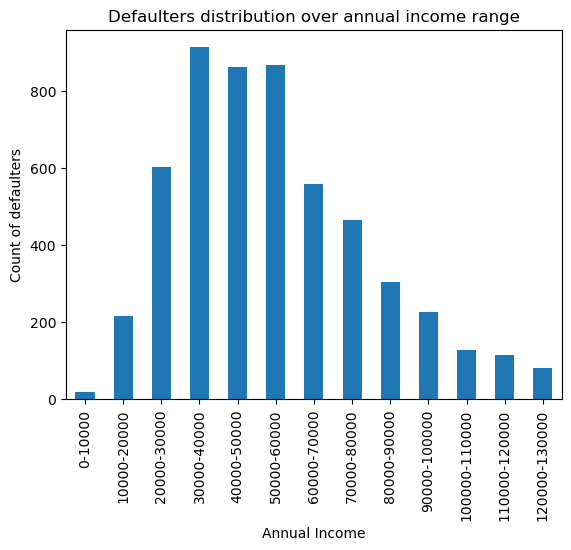

In [381]:
annual_inc_range = pd.cut(loan_df_refined['annual_inc'], bins=[0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000,130000], labels=['0-10000','10000-20000','20000-30000','30000-40000','40000-50000','50000-60000','60000-70000','70000-80000','80000-90000','90000-100000','100000-110000','110000-120000','120000-130000'])
annual_inc_range.value_counts().sort_index().plot.bar(title='Defaulters distribution over annual income range', xlabel='Annual Income', ylabel='Count of defaulters')
plt.show()

#### As can be seen from the above plot, annual income range from 30000 to 40000 defaulted the most, very closely followed by 40000-50000 and 50000-60000 range.
#### To conclude, annual income ranging from 30000 to 60000 defaulted the most.
#### We can see a bell curve. On both sides of the peak, the count of defaulters is decreasing.

### <b><i>issue_d</i> Column</b>

In [390]:
loan_df_refined['issue_d'].isnull().sum()

0

In [392]:
loan_df_refined['issue_d'].head()

1     Dec-11
8     Dec-11
9     Dec-11
12    Dec-11
14    Dec-11
Name: issue_d, dtype: object

In [402]:
loan_df_refined['issue_month'] = loan_df_refined['issue_d'].apply(lambda x: datetime.datetime.strptime(x,'%b-%y')).dt.month
loan_df_refined['issue_month']

1        12
8        12
9        12
12       12
14       12
         ..
39667     8
39668     8
39669     8
39678     8
39688     8
Name: issue_month, Length: 5627, dtype: int32

In [404]:
loan_df_refined['issue_year'] = loan_df_refined['issue_d'].apply(lambda x: datetime.datetime.strptime(x,'%b-%y')).dt.year
loan_df_refined['issue_year']

1        2011
8        2011
9        2011
12       2011
14       2011
         ... 
39667    2007
39668    2007
39669    2007
39678    2007
39688    2007
Name: issue_year, Length: 5627, dtype: int32

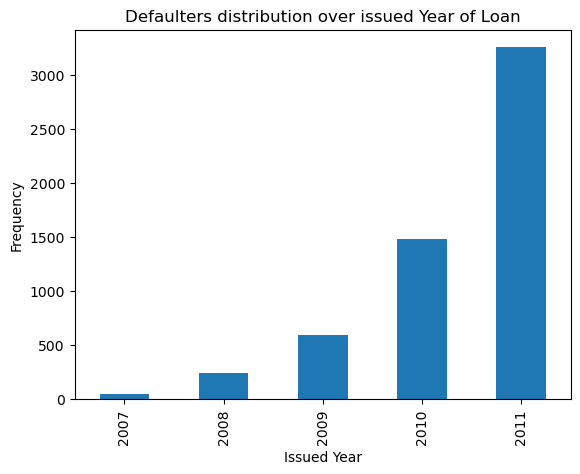

In [410]:
loan_df_refined['issue_year'].value_counts().sort_index().plot.bar(title='Defaulters distribution over issued Year of Loan', xlabel='Issued Year', ylabel='Frequency')
plt.show()

#### The defaulters' count is highest in the year 2011.

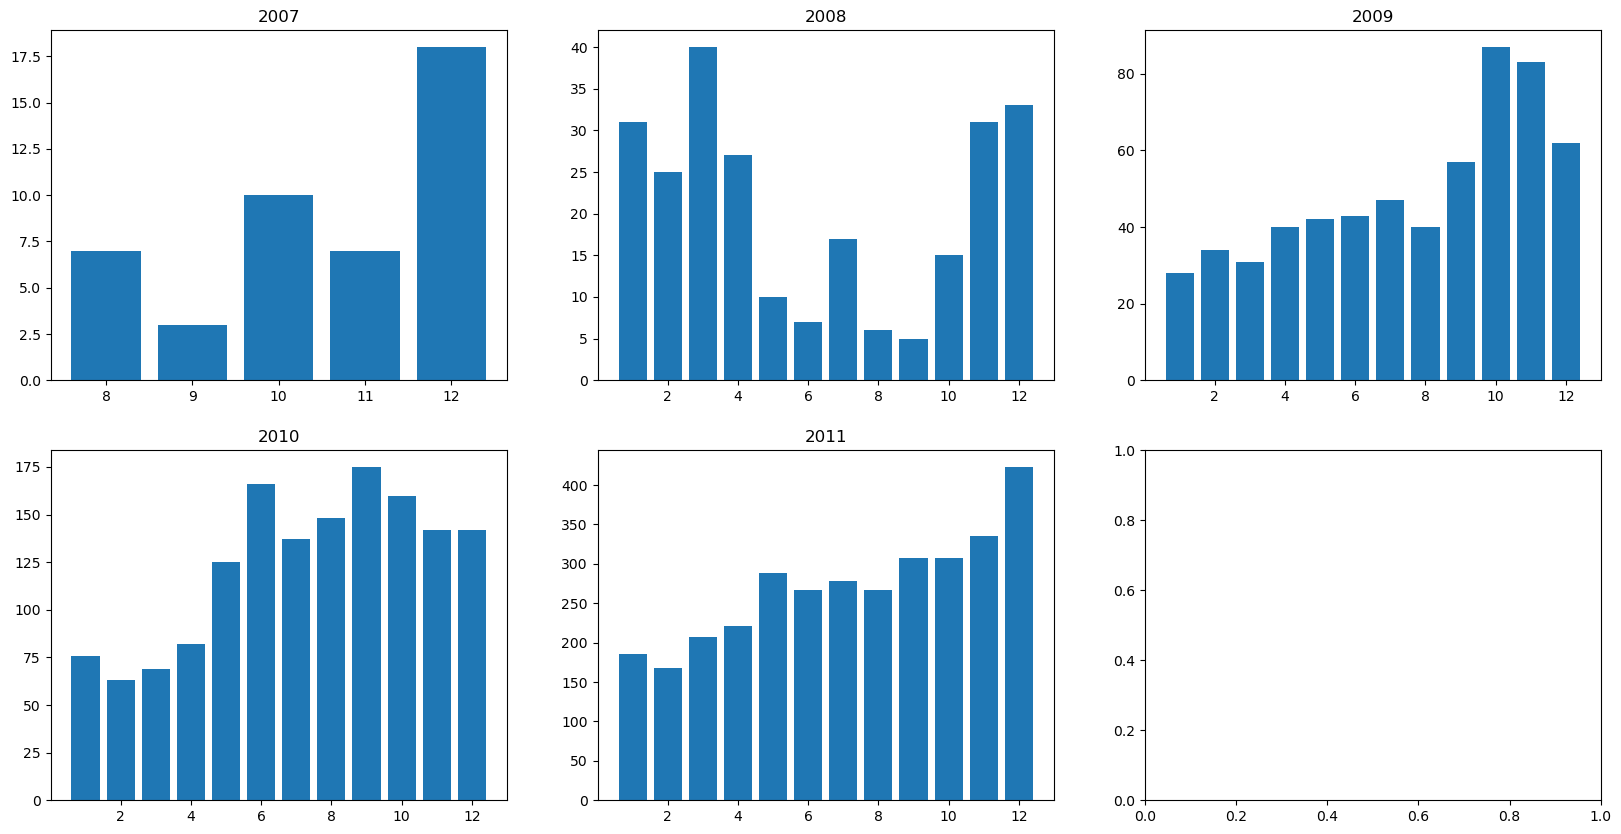

In [565]:
# Month wise distribution on defaulters for each year
fig, year_plots = plt.subplots(ncols=3, nrows=2,figsize=(20, 10))
years_arr = [2007,2008,2009]
for index,yr in enumerate(years_arr):    
    xVals = loan_df_refined[loan_df_refined['issue_year']==yr]['issue_month'].value_counts().index
    yVals = loan_df_refined[loan_df_refined['issue_year']==yr]['issue_month'].value_counts().values
    year_plots[0][index].bar(xVals, yVals)
    year_plots[0][index].set_title(yr)
    
years_arr = [2010,2011]
for index,yr in enumerate(years_arr):    
    xVals = loan_df_refined[loan_df_refined['issue_year']==yr]['issue_month'].value_counts().index
    yVals = loan_df_refined[loan_df_refined['issue_year']==yr]['issue_month'].value_counts().values
    year_plots[1][index].bar(xVals, yVals)
    year_plots[1][index].set_title(yr)


#### The above is the distribution subplots of defaulters month-wise for each loan issued year 

### <b><i>verification_status</i> Columns</b>

In [571]:
loan_df_refined['verification_status'].value_counts()

verification_status
Not Verified       2142
Verified           2051
Source Verified    1434
Name: count, dtype: int64

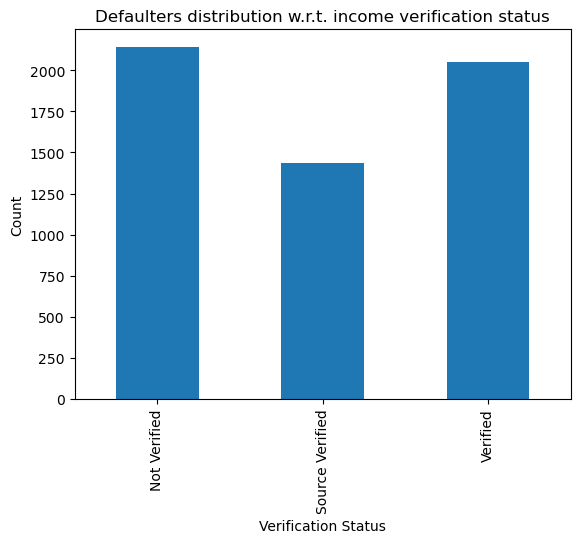

In [573]:
loan_df_refined['verification_status'].value_counts().sort_index().plot.bar(title='Defaulters distribution w.r.t. income verification status', xlabel='Verification Status', ylabel='Count')
plt.show()

#### The highest no. of defaulters are those whose income is not verified. 
#### But, there is very small margin in the count for defaulters for whom LC has verfied the income.

### <b><i>purpose</i> Column</b>

In [579]:
loan_df_refined['purpose'].value_counts()

purpose
debt_consolidation    2767
other                  633
credit_card            542
small_business         475
home_improvement       347
major_purchase         222
car                    160
medical                106
wedding                 96
moving                  92
house                   59
educational             56
vacation                53
renewable_energy        19
Name: count, dtype: int64

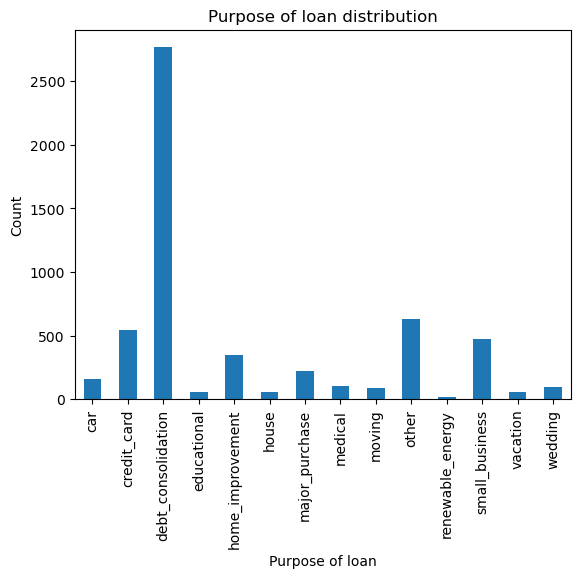

In [581]:
loan_df_refined['purpose'].value_counts().sort_index().plot.bar(title='Purpose of loan distribution', xlabel='Purpose of loan', ylabel='Count')
plt.show()

#### From the above bar plot, it can be seen that loan purpose of debt consolidation has the highest no.of defaulters.

### <b><i>delinq_2yrs</i> Column</b>
##### The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

In [585]:
loan_df_refined['delinq_2yrs'].value_counts()

delinq_2yrs
0    4936
1     507
2     130
3      35
4      13
5       3
7       1
6       1
8       1
Name: count, dtype: int64

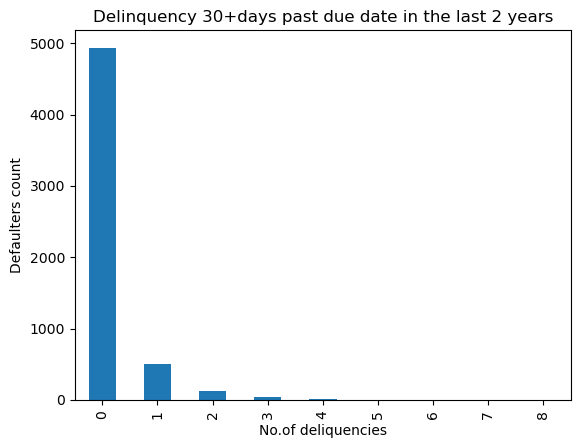

In [587]:
loan_df_refined['delinq_2yrs'].value_counts().sort_index().plot.bar(title='Delinquency 30+days past due date in the last 2 years', xlabel='No.of deliquencies', ylabel='Defaulters count')
plt.show()

#### From the bar plot, it can be seen that loan applicants who have not had any history of deliquency in the past 2 years have defaulted the most.

### Consolidated loan amount per Loan purpose category

In [920]:
loan_df_refined.groupby(['purpose'])['loan_amnt'].sum()

purpose
car                    1162275
credit_card            7054100
debt_consolidation    37404100
educational             440100
home_improvement       4134050
house                   745775
major_purchase         2027975
medical                 908250
moving                  546125
other                  5244325
renewable_energy        160000
small_business         6937325
vacation                311425
wedding                1035550
Name: loan_amnt, dtype: int64

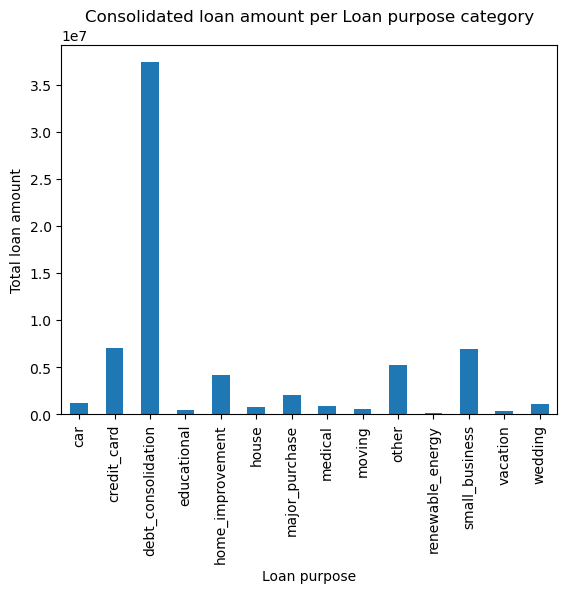

In [922]:
loan_df_refined.groupby(['purpose'])['loan_amnt'].sum().plot.bar(title='Consolidated loan amount per Loan purpose category', xlabel='Loan purpose', ylabel='Total loan amount')
plt.show()

#### The total loan amount accouting in debt consolidation is the highest at loan amount 37404100.

### <b><i>open_acc</i> Column<b>
##### The number of open credit lines in the borrower's credit file.

In [604]:
loan_df_refined['open_acc'].value_counts()

open_acc
7     557
8     546
6     543
9     518
10    465
5     425
11    382
4     364
12    301
13    263
3     258
14    217
15    168
2     127
16    105
17    102
18     68
19     59
20     42
21     37
22     18
23     12
25     11
24      9
26      7
27      6
28      5
30      3
31      3
33      2
35      1
29      1
38      1
34      1
Name: count, dtype: int64

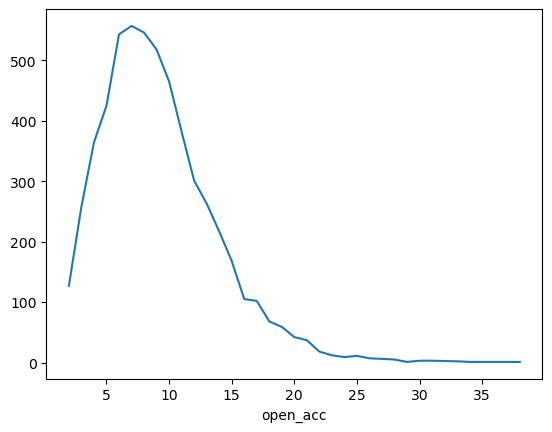

In [608]:
loan_df_refined['open_acc'].value_counts().sort_index().plot.line()
plt.show()

#### From the above line plot it can be seen that the no.of open credits has an increasing slope and peaks at around 7. 
#### It gradually decreases.

### <b><i>pub_rec</i> Column</b>
##### Number of derogatory public records

In [612]:
loan_df_refined['pub_rec'].value_counts()

pub_rec
0    5160
1     457
2      10
Name: count, dtype: int64

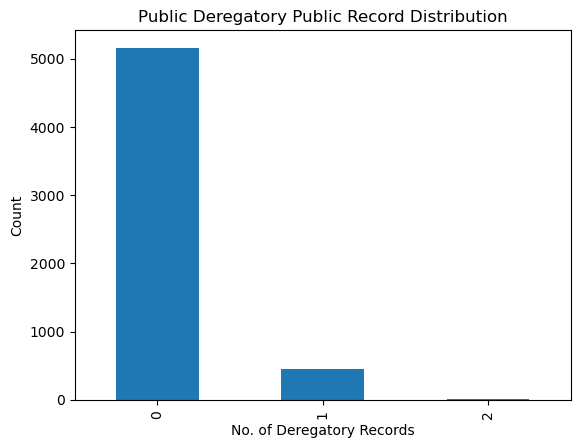

In [614]:
loan_df_refined['pub_rec'].value_counts().sort_index().plot.bar(title='Public Deregatory Public Record Distribution', xlabel='No. of Deregatory Records', ylabel='Count')
plt.show()

#### Applicants with zero public deregatory records are the highest no. of defaulters. Though we also see people with 2 public deregatory record constitute of approx 10% of defaulters.

### <b><i>pub_rec_bankruptcies</i> Column</b>
##### Number of public record bankruptcies

In [618]:
loan_df_refined['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.00    5141
1.00     366
2.00       2
Name: count, dtype: int64

#### The highest no. of defaulters dont have any public bankruptcy record. But, 366 people do have 1 public bankruptcy record.

### <b>Analysis of annual income and the loan amount</b>

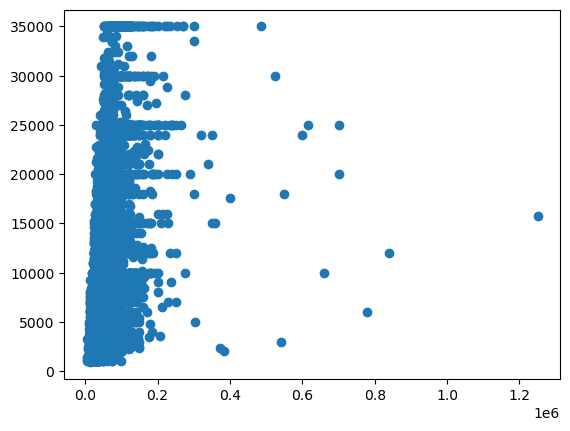

In [646]:
plt.scatter(loan_df_refined['annual_inc'], loan_df_refined['loan_amnt'])
plt.show()

In [632]:
loan_df_refined['annual_inc'].describe()

count      5627.00
mean      62427.30
std       47776.01
min        4080.00
25%       37000.00
50%       53000.00
75%       75000.00
max     1250000.00
Name: annual_inc, dtype: float64

In [638]:
#Annual income seems to widely distributed. Lets analyze excluding the outliers
annual_inc_Q1 = 37000.00
annual_inc_Q3 = 75000.00
annual_inc_IQR = annual_inc_Q3 - annual_inc_Q1
annual_inc_outlier = annual_inc_Q3 + 1.5*annual_inc_IQR
annual_inc_outlier

132000.0

In [661]:
df_inc_temp1 = loan_df_refined[loan_df_refined['annual_inc']<132000.00]
df_inc_temp1.shape

(5361, 40)

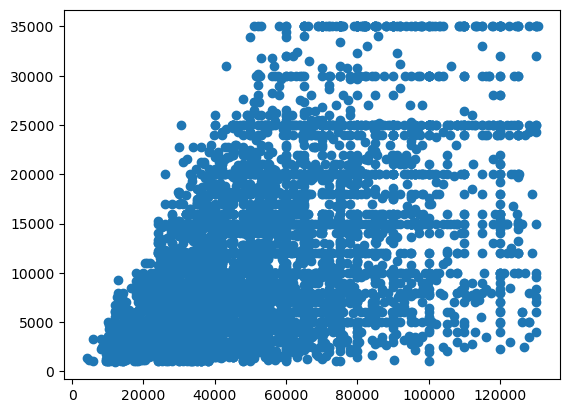

In [668]:
plt.scatter(df_inc_temp1['annual_inc'], df_inc_temp1['loan_amnt'])

#### The above scatter plot really does not give any insight.

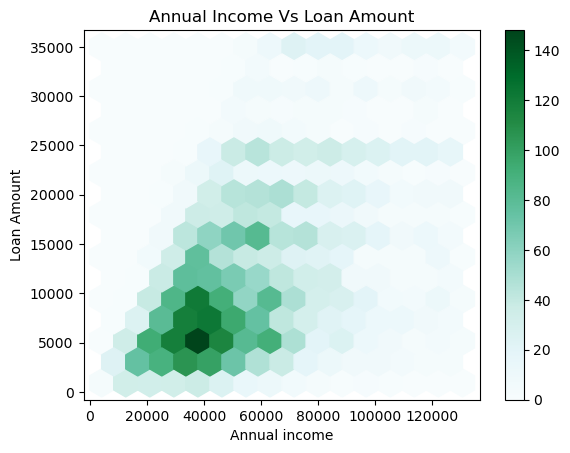

In [665]:
df_inc_temp1.plot.hexbin(x='annual_inc', y='loan_amnt', gridsize=15)
plt.title('Annual Income Vs Loan Amount');
plt.xlabel('Annual income');
plt.ylabel('Loan Amount')
plt.show()

#### From the above plot, it is evident that applicants with an annual income ~40000 and applied for a loan of ~ 5000 have defaulted the most.
#### The cluster of highest defaulters is around ~15000 to ~70000 annual income and ~2000 to ~15000 loan amount.

### <b>Analysis of Loan Amount vs Interest rate</b>

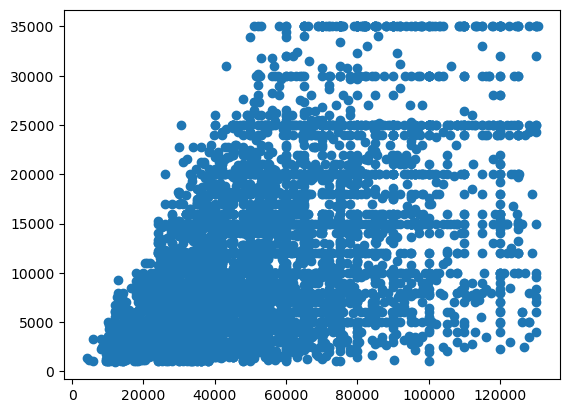

In [670]:
# Analysing on the df_inc_temp1 with removed outliers from the income
plt.scatter(df_inc_temp1['annual_inc'], df_inc_temp1['int_rate'])

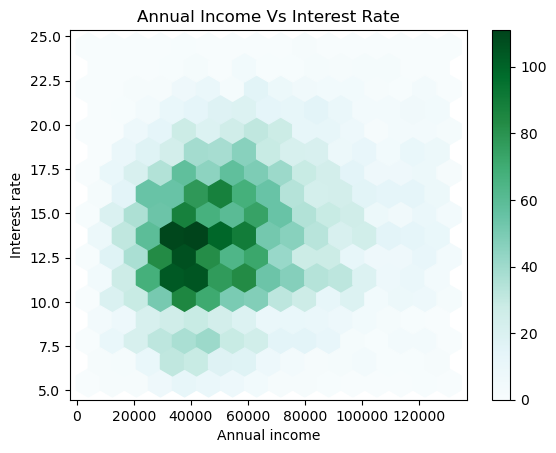

In [672]:
df_inc_temp1.plot.hexbin(x='annual_inc', y='int_rate', gridsize=15)
plt.title('Annual Income Vs Interest Rate');
plt.xlabel('Annual income');
plt.ylabel('Interest rate')
plt.show()

#### From the above plot, we can see that an annual income in the range of ~30000 to ~50000 having interest rate in the range ~11.5 to ~13.5 have the highest defaulters.

### <b>Loan amount vs Term of loan</b>

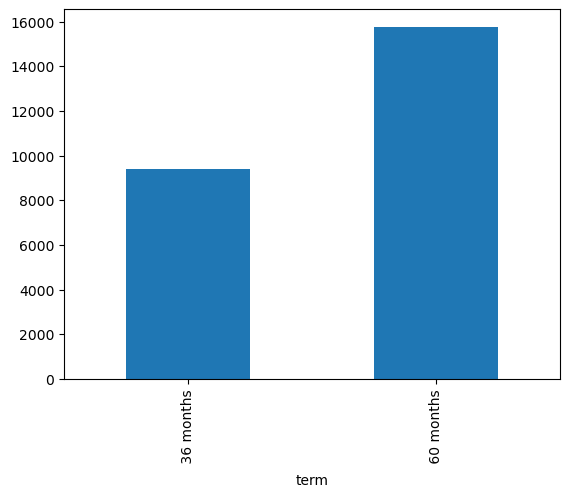

In [677]:
loan_df_refined.groupby(['term'])['loan_amnt'].mean().plot.bar()
plt.show()

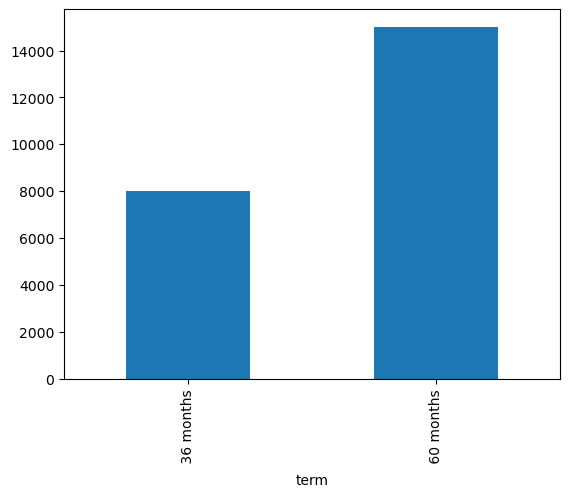

In [679]:
loan_df_refined.groupby(['term'])['loan_amnt'].median().plot.bar()
plt.show()

#### Earlier we had seen that loans with 36 months of loan term defaulted the most. With the above maps where the bar plots show the average and median loan amounts for each term category, we observe that the highest loan amounts have 60 months term.
#### So, even if the average loan amount is less for 36 months term, still they are the most defaulted.

### <b><i>Employement length vs loan amount</i></b>

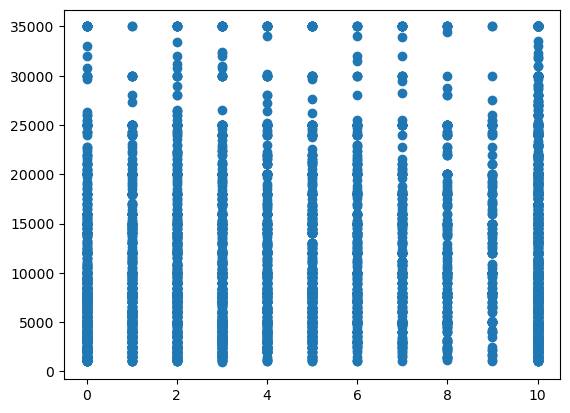

In [688]:
plt.scatter(loan_df_refined['emp_length_num'], loan_df_refined['loan_amnt'])

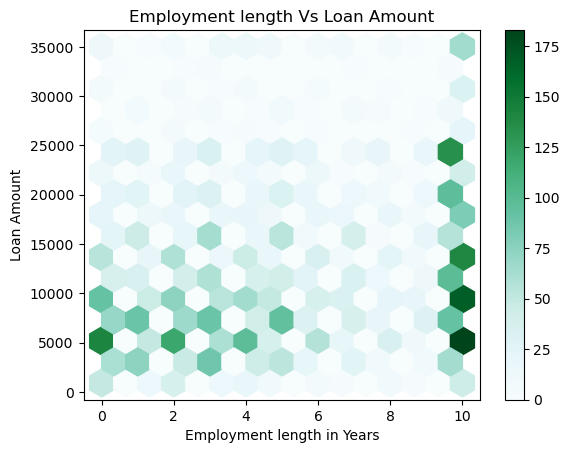

In [694]:
loan_df_refined.plot.hexbin(x='emp_length_num', y='loan_amnt', gridsize=15)
plt.title('Employment length Vs Loan Amount')
plt.xlabel('Employment length in Years')
plt.ylabel('Loan Amount')
plt.show()

#### Applicants with employment length of 10+ years with loan amount ~5000 have defaulted the most. Followed by 10+ years experience with ~10000 loan amount. 3rd most defaulted are emp length of 10+ years and loan amount of ~13000 and less than 1 year exp with loan amount of ~5000.

#### Applicants with 10+ years expereince have defaulted the most irrespective of loan amount.

### Loan Grade vs loan amount

In [699]:
loan_df_refined['grade'].value_counts()

grade
B    1425
C    1347
D    1118
E     715
A     602
F     319
G     101
Name: count, dtype: int64

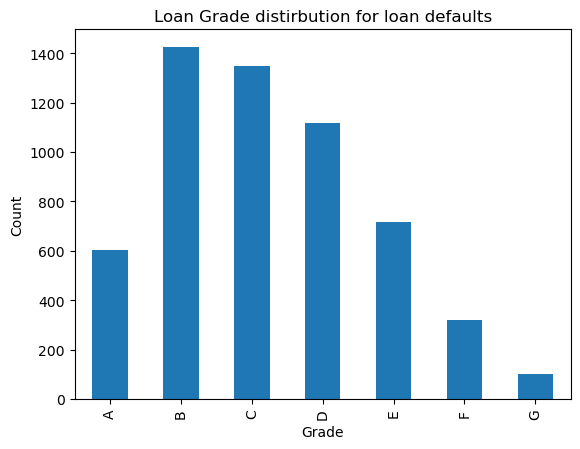

In [935]:
loan_df_refined['grade'].value_counts().sort_index().plot.bar(title='Loan Grade distirbution for loan defaults', xlabel='Grade',ylabel='Count')
plt.show()

##### Loans with Grade B have defaulted the most followed by Grade C and Grade D.

In [937]:
loan_df_refined.groupby(['grade'])['loan_amnt'].mean()

grade
A    7799.92
B   10905.77
C   11044.47
D   12204.65
E   15849.83
F   19272.57
G   18542.82
Name: loan_amnt, dtype: float64

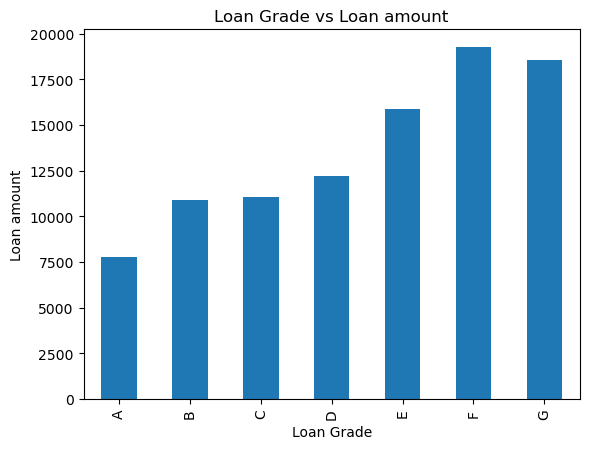

In [717]:
loan_df_refined.groupby(['grade'])['loan_amnt'].mean().plot.bar()
plt.title('Loan Grade vs Loan amount')
plt.xlabel('Loan Grade')
plt.ylabel('Loan amount')
plt.show()

##### From the above two plots we can see that even though the average loan amount applied for Loan Grade B,C and D is relatively moderate compared to other Grades like F,G, E, still they are the highest defaulters.

### <b><i>dti </i>Column</b>
##### Debt to income ratio

In [725]:
loan_df_refined['dti'].dtypes

dtype('float64')

In [727]:
loan_df_refined['dti'].describe()

count   5627.00
mean      14.00
std        6.59
min        0.00
25%        9.05
50%       14.29
75%       19.29
max       29.85
Name: dti, dtype: float64

<Axes: >

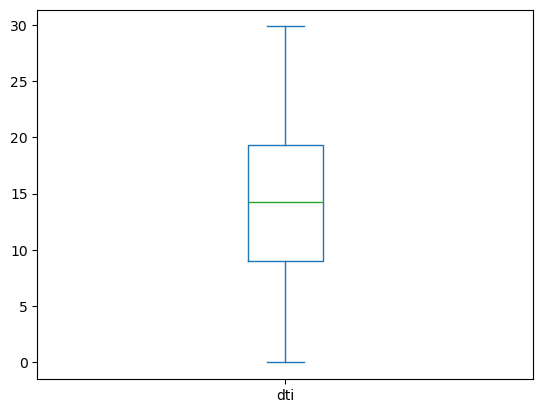

In [733]:
loan_df_refined['dti'].plot.box()

##### The average debt to income ratio for the defaulted loans is 14%.

In [944]:
loan_df_refined.groupby(['emp_length'])['dti'].median()

emp_length
1 year      14.35
10+ years   14.60
2 years     13.99
3 years     14.10
4 years     13.61
5 years     14.48
6 years     14.56
7 years     15.35
8 years     15.32
9 years     14.44
< 1 year    13.28
Name: dti, dtype: float64

<Axes: xlabel='emp_length', ylabel='Average Debt to Income Ratio'>

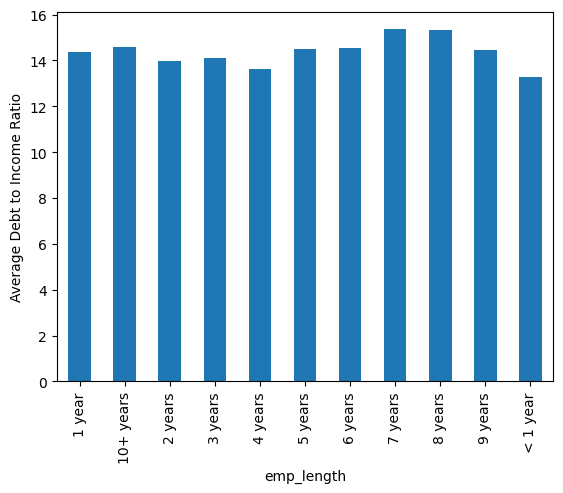

In [948]:
loan_df_refined.groupby(['emp_length'])['dti'].median().plot.bar(ylabel='Average Debt to Income Ratio')

#### The average Debt to Income ratio per employment length is almost the same for all employment length category.

### <b><i>total_acc</i> Column </b>
##### The total number of credit lines currently in the borrower's credit file

<Axes: ylabel='Frequency'>

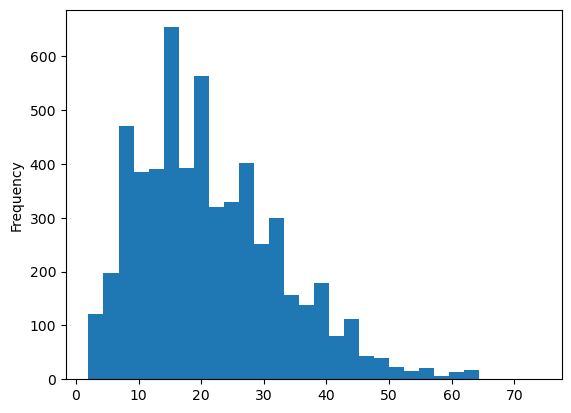

In [746]:
loan_df_refined['total_acc'].plot.hist(bins=30)

C:\Users\abant\AppData\Local\Temp\ipykernel_127600\3884615902.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_df_refined['total_acc'])


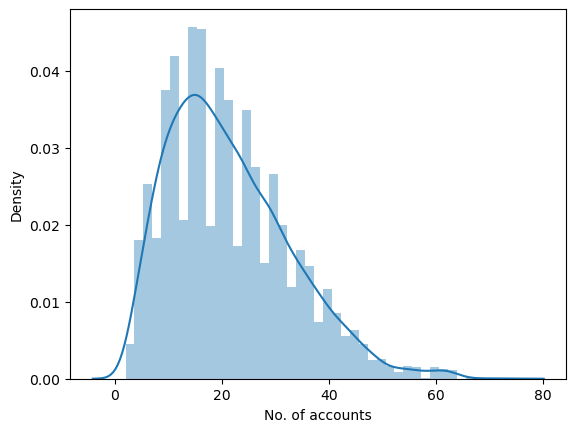

In [754]:
sns.distplot(loan_df_refined['total_acc'])
plt.xlabel('No. of accounts')
plt.show()

#### From the above plot, it can be seen that most defaulters had multiple open credit lines. The plot shows a distribution graph with the defaulters number increasing with the no.of accounts with open credit lines, it peaks at around ~18 and then slopes down.

### <b><i>revol_util</i> Column</b>
##### Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [759]:
loan_df_refined['revol_util'].head()

1      9.40%
8     32.60%
9     36.50%
12    91.70%
14    55.50%
Name: revol_util, dtype: object

In [761]:
loan_df_refined['revol_util_percent'] = loan_df_refined['revol_util'].str.replace('%','').astype('float64')
loan_df_refined['revol_util_percent'].head()

1     9.40
8    32.60
9    36.50
12   91.70
14   55.50
Name: revol_util_percent, dtype: float64

In [765]:
loan_df_refined['revol_util_percent'].isnull().sum()

16

In [767]:
loan_df_refined['revol_util_percent'].describe()

count   5611.00
mean      55.57
std       27.91
min        0.00
25%       34.40
50%       58.40
75%       79.00
max       99.90
Name: revol_util_percent, dtype: float64

In [771]:
#Imputing missing values with median
loan_df_refined['revol_util_percent'] = loan_df_refined['revol_util_percent'].fillna(58.40)
loan_df_refined['revol_util_percent'].isnull().sum()

0

C:\Users\abant\AppData\Local\Temp\ipykernel_127600\1760176992.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_df_refined['revol_util_percent'])


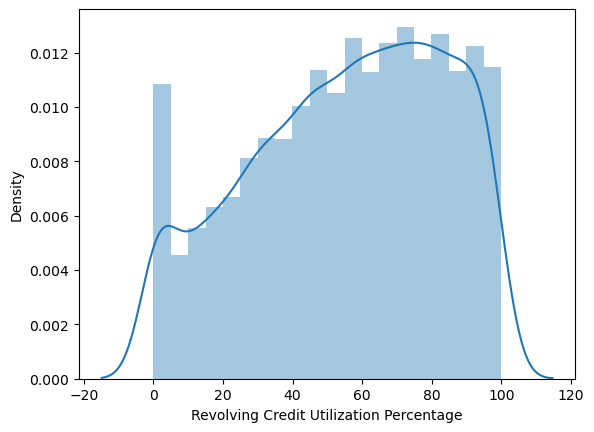

In [773]:
sns.distplot(loan_df_refined['revol_util_percent'])
plt.xlabel('Revolving Credit Utilization Percentage')
plt.show()

#### As the revolving credit utilization percentage is increasing, so is the no.of loan defaults. The distribution graph shows a peak at around 80%.

### <b><i>revol_bal</i> Column</b>
##### Total credit revolving balance 

In [778]:
loan_df_refined['revol_bal'].isnull().sum()

0

In [782]:
loan_df_refined['revol_bal'].describe()

count     5627.00
mean     13514.24
std      15164.12
min          0.00
25%       3968.00
50%       9211.00
75%      17518.00
max     148829.00
Name: revol_bal, dtype: float64

<Axes: >

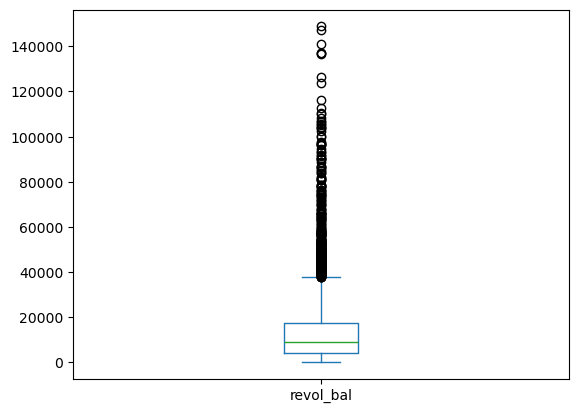

In [784]:
loan_df_refined['revol_bal'].plot.box()

##### There is a wide distribution of revolving credit balances. From the box plot we can see a lot of outliers. Clearly, a high revolving credit balance is a clear signal of loan defaults.
##### Analysing on the data with outlier removed.


In [787]:
revol_bal_Q1 = 3968.00
revol_bal_Q3 = 17518.00
revol_bal_IQR = revol_bal_Q3 - revol_bal_Q1
revol_bal_outlier = revol_bal_Q3 + 1.5 * revol_bal_IQR
revol_bal_outlier

37843.0

In [789]:
revol_bal_refined = loan_df_refined[loan_df_refined['revol_bal']<revol_bal_outlier]
revol_bal_refined.shape

(5280, 42)

C:\Users\abant\AppData\Local\Temp\ipykernel_127600\3276127488.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(revol_bal_refined['revol_bal'])


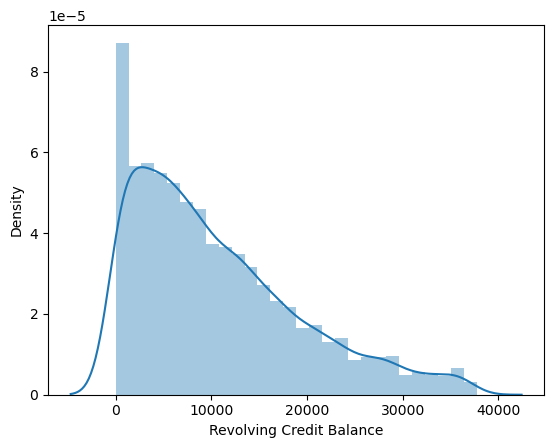

In [791]:
sns.distplot(revol_bal_refined['revol_bal'])
plt.xlabel('Revolving Credit Balance')
plt.show()

#### From the above distribution plot, it can be seen that maximun defaulters have a revolving credit balance of between 0 to 10000.

### <b>Purpose of Loan Vs Loan Amount</b>

<Axes: xlabel='purpose'>

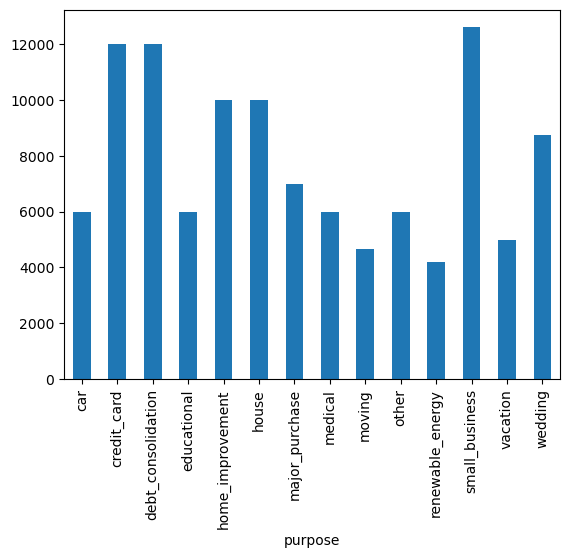

In [803]:
loan_df_refined.groupby(['purpose'])['loan_amnt'].median().plot.bar()

##### Categories with the highest average loan amounts are Small business, Credit card and Debt Consolidation. Followed by Home improvement, Home and Wedding.

### <b><i>addr_state</i> Column</b>

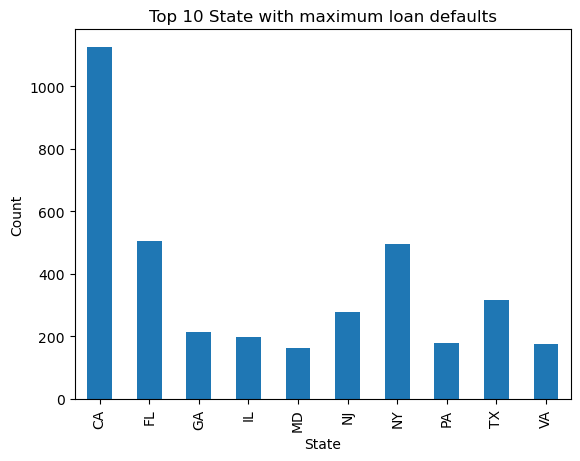

In [817]:
loan_df_refined['addr_state'].value_counts().head(10).sort_index().plot.bar(title='Top 10 State with maximum loan defaults', xlabel='State',ylabel='Count')
plt.show()

##### State with highest no.of loan counts is CA followed by FL and NY.

### <b>Top 10 Defaulters State Vs Category</b>

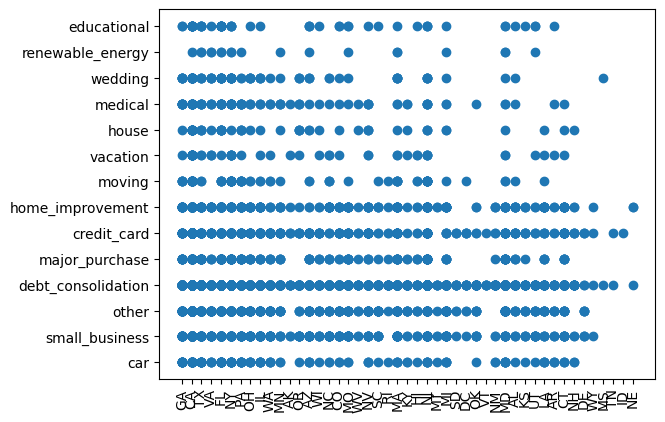

In [899]:
plt.scatter(loan_df_refined['addr_state'],loan_df_refined['purpose'])
plt.xticks(rotation=90)
plt.show()

In [849]:
top_state_df = loan_df_refined[loan_df_refined['addr_state'].isin(loan_df_refined['addr_state'].value_counts().head(10).index)]
top_state_df

(3649, 42)

In [867]:
temp = top_state_df.groupby(['addr_state'])['purpose'].value_counts()
temp

addr_state  purpose           
CA          debt_consolidation    548
            credit_card           144
            other                 119
            small_business         88
            home_improvement       60
                                 ... 
VA          major_purchase          3
            vacation                3
            renewable_energy        2
            educational             1
            house                   1
Name: count, Length: 135, dtype: int64

In [869]:
temp.to_csv('stateVspurpose.csv')

In [875]:
temp_df = pd.read_csv('stateVspurpose.csv')
temp_df.head()

,addr_state,purpose,count
0,CA,debt_consolidation,548
1,CA,credit_card,144
2,CA,other,119
3,CA,small_business,88
4,CA,home_improvement,60


In [879]:
state_purp_pt = pd.pivot_table(data=temp_df, index='addr_state',columns='purpose',values='count')
state_purp_pt

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
addr_state,,,,,,,,,,,,,,
CA,26.00,144.00,548.00,10.00,60.00,15.00,35.00,17.00,23.00,119.00,1.00,88.00,14.00,25.00
FL,16.00,46.00,232.00,9.00,40.00,7.00,30.00,9.00,5.00,48.00,2.00,50.00,1.00,9.00
GA,10.00,14.00,90.00,2.00,20.00,1.00,9.00,8.00,5.00,30.00,NaN,19.00,1.00,6.00
IL,6.00,27.00,99.00,1.00,10.00,1.00,5.00,3.00,2.00,16.00,NaN,22.00,1.00,4.00
MD,6.00,9.00,91.00,2.00,7.00,1.00,9.00,2.00,2.00,21.00,2.00,7.00,2.00,1.00
NJ,5.00,17.00,151.00,3.00,18.00,3.00,14.00,5.00,10.00,23.00,NaN,20.00,4.00,5.00
NY,10.00,47.00,263.00,4.00,18.00,1.00,17.00,11.00,12.00,61.00,2.00,33.00,6.00,10.00
PA,8.00,13.00,79.00,NaN,16.00,4.00,9.00,7.00,7.00,20.00,1.00,13.00,1.00,2.00
TX,11.00,25.00,139.00,5.00,18.00,4.00,17.00,6.00,2.00,52.00,2.00,29.00,2.00,4.00


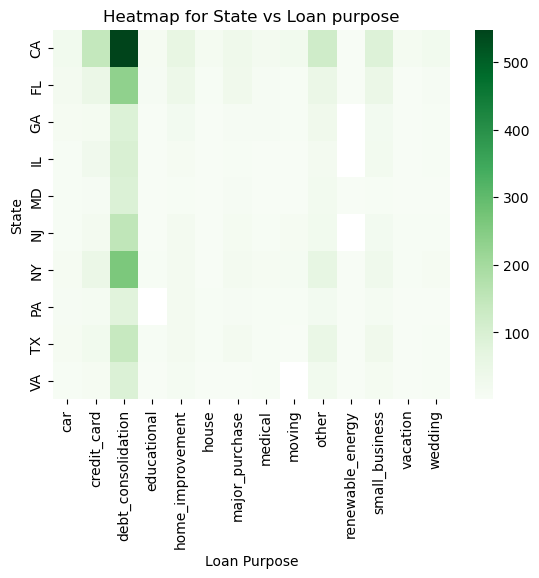

In [891]:
sns.heatmap(state_purp_pt, cmap='Greens')
plt.title('Heatmap for State vs Loan purpose');
plt.xlabel('Loan Purpose')
plt.ylabel('State')
plt.show()

##### As we can see from the heatmap between the top 10 States with defaulted loans, irrespective of the State, debt conslidation has highest share of defaulted loans.